# How to get a Correlation Tile with Sorbetto? 

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sorbetto.flavor.correlation_flavor import CorrelationFlavor
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.performance.finite_set_of_two_class_classification_performances import (
    FiniteSetOfTwoClassClassificationPerformances,
)
from sorbetto.performance.two_class_classification_performance import (
    TwoClassClassificationPerformance,
)
from sorbetto.ranking.ranking_score import RankingScore
from sorbetto.tile.correlation_tile import CorrelationTile

## Define performance 1
You can actually define as many performances as you want depending on your use cases.

In [3]:
# Define the performance
proba_tn = 0.4
proba_fp = 0.045
proba_fn = 0.055
proba_tp = 0.5

# Create a performance object
performance1 = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)

## Define performance 2

In [4]:
# Define the performance
proba_tn = 0.3
proba_fp = 0.055
proba_fn = 0.045
proba_tp = 0.6

# Create a performance object
performance2 = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)

## Define performance 3

In [5]:
# Define the performance
proba_tn = 0.45
proba_fp = 0.08
proba_fn = 0.07
proba_tp = 0.4

# Create a performance object
performance3 = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)

## Define performance 4

In [6]:
# Define the performance
proba_tn = 0.38
proba_fp = 0.15
proba_fn = 0.1
proba_tp = 0.37

# Create a performance object
performance4 = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)

## Define the score for which you want the correlation

In [7]:
# Create a score object
accuracy_score = RankingScore.getAccuracy()

## Get Correlation Tile

100%|██████████| 101/101 [00:02<00:00, 36.47it/s]


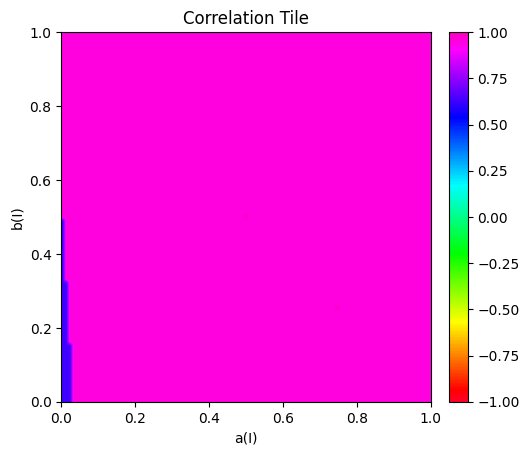

In [8]:
# Create the flavor object
flavor = CorrelationFlavor(
    performances=FiniteSetOfTwoClassClassificationPerformances(
        [performance1, performance2, performance3, performance4]
    ),
    score=accuracy_score,
    correlation_coefficient="spearman_rho",  # "kendall_tau", "spearman_rho", or "pearson_r"
)

# Create the tile object
tile = CorrelationTile(
    parameterization=ParameterizationDefault(),
    flavor=flavor,
    resolution=101,
)

# Draw the entity tile
fig, ax = tile.draw()
plt.show()

## Get a Correlation Tile with performances drawn at random from a uniform distribution

In [9]:
from sorbetto.performance.distribution.uniform_distribution_of_two_class_classification_performances import (
    UniformDistributionOfTwoClassClassificationPerformances,
)

In [10]:
# Draw 1,000 performances at random
number_of_performances_drawn_at_random = 1000
performances_drawn_at_random = UniformDistributionOfTwoClassClassificationPerformances(
    "Uniform distribution of performances"
).drawAtRandom(number_of_performances_drawn_at_random)

100%|██████████| 101/101 [00:02<00:00, 34.36it/s]


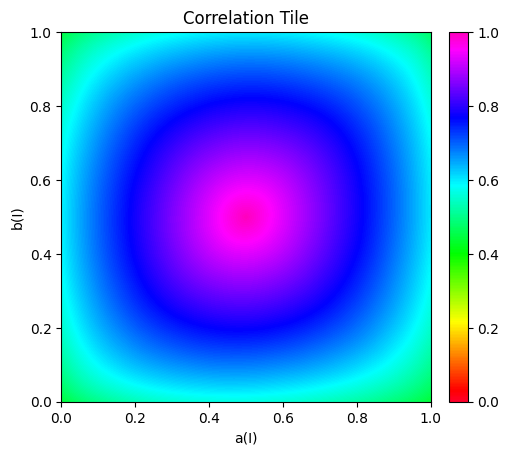

In [11]:
# Create the flavor object
flavor = CorrelationFlavor(
    performances=performances_drawn_at_random,
    score=accuracy_score,
    correlation_coefficient="kendall_tau",
)

# Create the tile object
tile = CorrelationTile(
    parameterization=ParameterizationDefault(),
    flavor=flavor,
    resolution=101,
)

# Draw the entity tile
fig, ax = tile.draw()
ax.images[-1].set_clim(0, 1)
plt.show()